In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings("ignore")

In [2]:
%cd ..

/home/suetin/Projects/VSCode/TennisApp/MainApp/TennisApp


In [3]:
# read the picle file
with open('data/temporary/ball_detections.pkl', 'rb') as f:  # /home/suetin/Projects/VSCode/TennisApp/MainApp/TennisApp/data/temporary/ball_detections.pkl
    ball_positions = pickle.load(f)

In [4]:
ball_positions[:3]

[(None, None), (6, 177), (None, None)]

In [5]:
# convert the list into pandas.DataFrame
df_ball_positions = pd.DataFrame(np.array(ball_positions), columns=['x', 'y'], dtype=float)
# interpolate the missing values
print(df_ball_positions.isna().sum())
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()
print(df_ball_positions.isna().sum())

# # Convert pandas.DataFrame to original format. Back up
# ball_positions = df_ball_positions.astype(int).tolist()  # .to_numpy()
# ball_positions

x    34
y    34
dtype: int64
x    0
y    0
dtype: int64


In [6]:
# MA 
df_ball_positions['y_ma'] = df_ball_positions['y'].rolling(window=5, min_periods=1, center=False).mean()
df_ball_positions['x_ma'] = df_ball_positions['x'].rolling(window=5, min_periods=1, center=False).mean()
df_ball_positions.sample(5)

,x,y,y_ma,x_ma
196,162.0,113.0,113.0,162.0
300,437.0,137.0,157.6,177.4
17,454.0,122.0,153.8,185.6
343,6.0,177.0,177.0,6.0
341,6.0,177.0,177.0,6.0


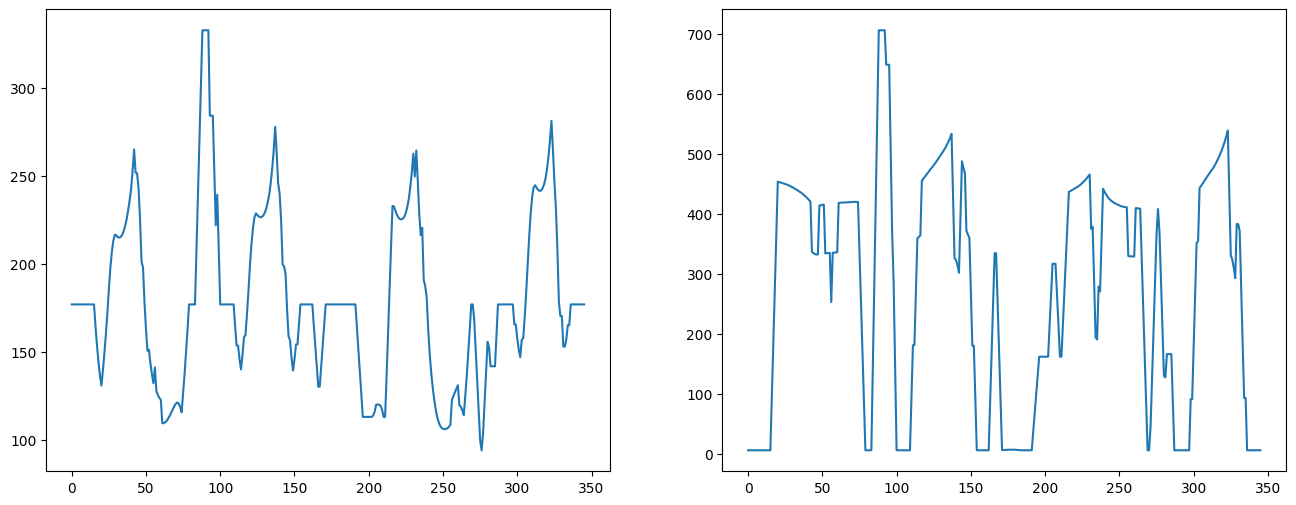

In [7]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(df_ball_positions['y_ma'])
plt.subplot(1, 2, 2)
plt.plot(df_ball_positions['x_ma'])

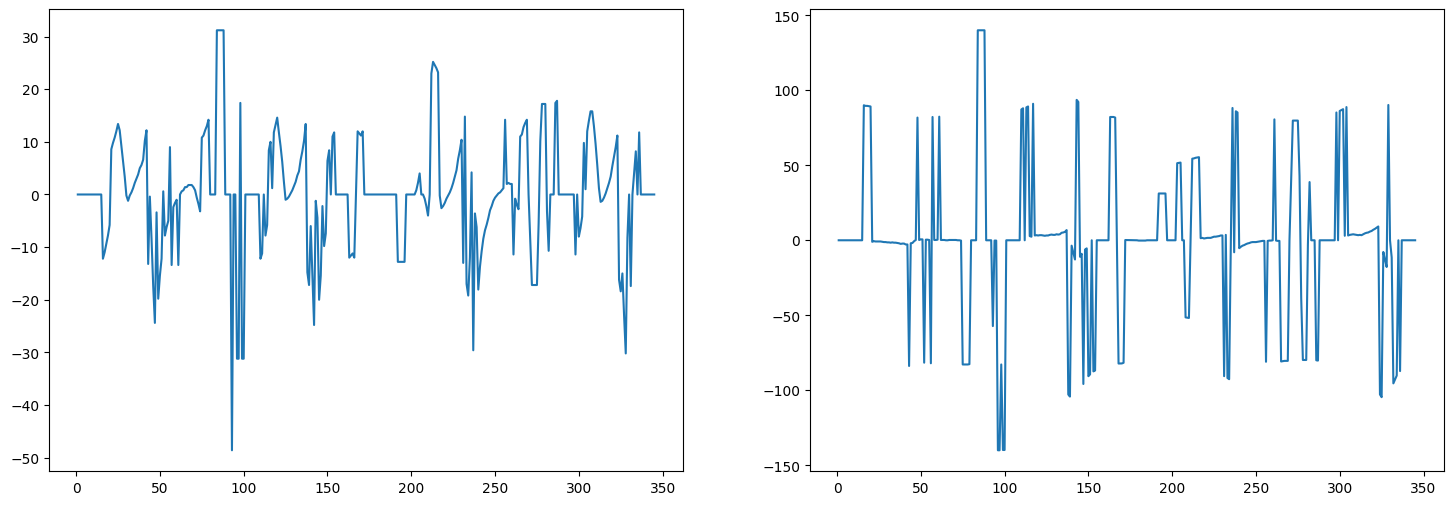

In [8]:
df_ball_positions['delta_y'] = df_ball_positions['y_ma'].diff()
df_ball_positions['delta_x'] = df_ball_positions['x_ma'].diff()


plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(df_ball_positions['delta_y'])
plt.subplot(1, 2, 2)
plt.plot(df_ball_positions['delta_x'])

In [9]:
df_ball_positions['ball_hit'] = 0


minimum_change_frames_for_hit = 25

for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit*1.2) ):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] >0

            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count > minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1


frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()
df_ball_positions[df_ball_positions['ball_hit']==1]

,x,y,y_ma,x_ma,delta_y,delta_x,ball_hit


## Hits the ball

In [10]:
df_ball_positions['y_ma_shifted'] = df_ball_positions['y_ma'].shift(1)
df_ball_positions['x_ma_shifted'] = df_ball_positions['x_ma'].shift(1)
df_ball_positions.fillna(0, inplace=True)
df_ball_positions.tail(20)

,x,y,y_ma,x_ma,delta_y,delta_x,ball_hit,y_ma_shifted,x_ma_shifted
326,499.0,205.0,231.8,323.6,-15.0,-7.8,0,246.8,331.4
327,483.0,177.0,208.8,310.6,-23.0,-13.0,0,231.8,323.6
328,470.0,157.0,178.6,292.8,-30.2,-17.8,0,208.8,310.6
329,457.0,136.0,170.4,383.0,-8.2,90.2,0,178.6,292.8
330,6.0,177.0,170.4,383.0,0.0,0.0,0,170.4,383.0
331,442.0,118.0,153.0,371.6,-17.4,-11.4,0,170.4,383.0
332,6.0,177.0,153.0,276.2,0.0,-95.4,0,153.0,371.6
333,6.0,177.0,157.0,183.4,4.0,-92.8,0,153.0,276.2
334,6.0,177.0,165.2,93.2,8.2,-90.2,0,157.0,183.4
335,6.0,177.0,165.2,93.2,0.0,0.0,0,165.2,93.2


In [11]:
from scipy.spatial import distance

def measure_distance(p1, p2):
    """
    p1 - player_center
    p2 - court_keypoint
    """
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

In [12]:
df_ball_positions['x_norm'] = (df_ball_positions['x'] - df_ball_positions['x'].min()) / (df_ball_positions['x'].max() - df_ball_positions['x'].min())
df_ball_positions['y_norm'] = (df_ball_positions['y'] - df_ball_positions['y'].min()) / (df_ball_positions['y'].max() - df_ball_positions['y'].min())
df_ball_positions.sample(5)

,x,y,y_ma,x_ma,delta_y,delta_x,ball_hit,y_ma_shifted,x_ma_shifted,x_norm,y_norm
98,6.0,177.0,239.4,285.6,17.4,-82.8,0,222.0,368.4,0.000000,0.363265
322,548.0,292.0,270.2,529.6,9.0,8.4,0,261.2,521.2,0.774286,0.832653
24,449.0,198.0,172.0,450.6,12.0,-0.8,0,160.0,451.4,0.632857,0.448980
131,511.0,238.0,231.6,503.0,2.4,4.0,0,229.2,499.0,0.721429,0.612245
256,6.0,177.0,122.8,329.8,14.2,-81.0,0,108.6,410.8,0.000000,0.363265


In [13]:
# MA 
df_ball_positions['y_ma'] = df_ball_positions['y_norm'].rolling(window=5, min_periods=1, center=False).mean()
df_ball_positions['x_ma'] = df_ball_positions['x_norm'].rolling(window=5, min_periods=1, center=False).mean()

df_ball_positions['y_ma_shifted'] = df_ball_positions['y_ma'].shift(1)
df_ball_positions['x_ma_shifted'] = df_ball_positions['x_ma'].shift(1)
df_ball_positions.fillna(0, inplace=True)

In [14]:
df_ball_positions['y_shifted'] = df_ball_positions['y'].shift(1)
df_ball_positions['x_shifted'] = df_ball_positions['x'].shift(1)
df_ball_positions.fillna(0, inplace=True)

In [15]:
df_ball_positions['distance'] = ((df_ball_positions['x_shifted'] - df_ball_positions['x'])**2 \
                                + (df_ball_positions['y_shifted'] - df_ball_positions['y'])**2) 
                                                 
df_ball_positions

,x,y,y_ma,x_ma,delta_y,delta_x,ball_hit,y_ma_shifted,x_ma_shifted,x_norm,y_norm,y_shifted,x_shifted,distance
0,6.0,177.0,0.363265,0.0,0.0,0.0,0,0.000000,0.0,0.0,0.363265,0.0,0.0,31365.0
1,6.0,177.0,0.363265,0.0,0.0,0.0,0,0.363265,0.0,0.0,0.363265,177.0,6.0,0.0
2,6.0,177.0,0.363265,0.0,0.0,0.0,0,0.363265,0.0,0.0,0.363265,177.0,6.0,0.0
3,6.0,177.0,0.363265,0.0,0.0,0.0,0,0.363265,0.0,0.0,0.363265,177.0,6.0,0.0
4,6.0,177.0,0.363265,0.0,0.0,0.0,0,0.363265,0.0,0.0,0.363265,177.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,6.0,177.0,0.363265,0.0,0.0,0.0,0,0.363265,0.0,0.0,0.363265,177.0,6.0,0.0
342,6.0,177.0,0.363265,0.0,0.0,0.0,0,0.363265,0.0,0.0,0.363265,177.0,6.0,0.0
343,6.0,177.0,0.363265,0.0,0.0,0.0,0,0.363265,0.0,0.0,0.363265,177.0,6.0,0.0
344,6.0,177.0,0.363265,0.0,0.0,0.0,0,0.363265,0.0,0.0,0.363265,177.0,6.0,0.0


<Axes: >

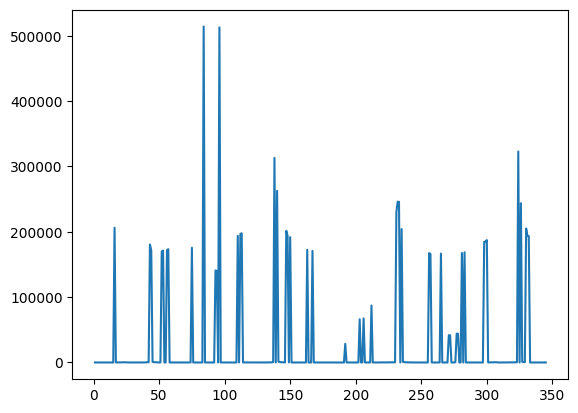

In [16]:
df_ball_positions['distance'][1:].plot()

In [17]:
threshold = df_ball_positions['distance'][1:].quantile(0.90)
threshold

167122.6

In [18]:
len(df_ball_positions[df_ball_positions['distance'] > threshold])  # 

35

In [19]:
df_ball_positions['x'] = np.where(df_ball_positions['distance'] < threshold, df_ball_positions['x'].values, np.NaN)
df_ball_positions['y'] = np.where(df_ball_positions['distance'] < threshold, df_ball_positions['y'].values, np.NaN)
df_ball_positions[['x', 'y']].isna().sum()

x    35
y    35
dtype: int64

In [20]:
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()
df_ball_positions[['x', 'y']].isna().sum()

x    0
y    0
dtype: int64

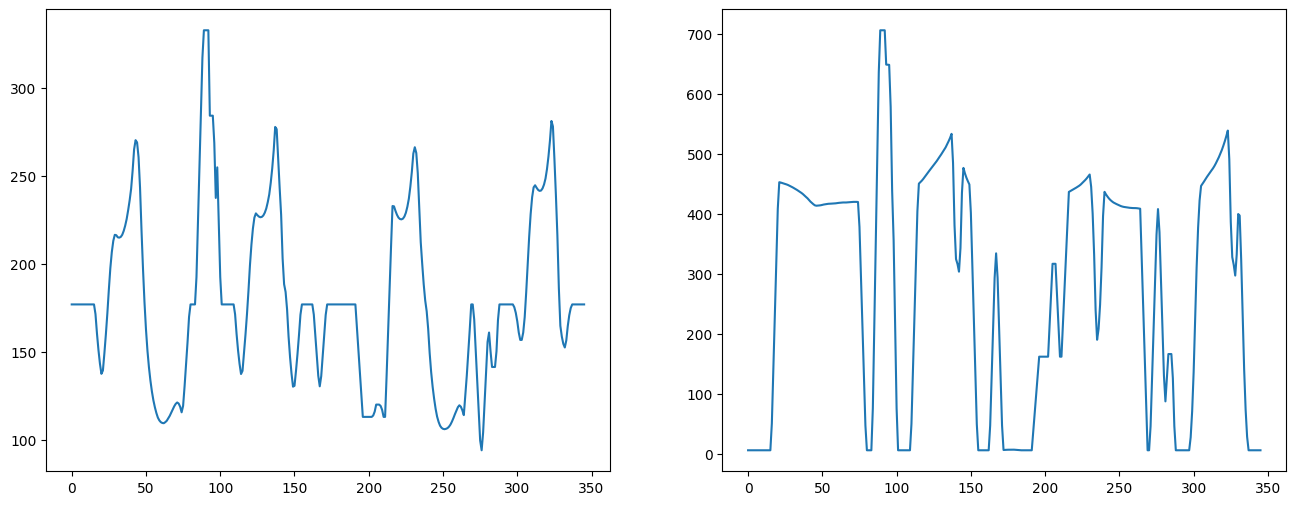

In [21]:
# MA 
df_ball_positions['y_ma'] = df_ball_positions['y'].rolling(window=5, min_periods=1, center=False).mean()
df_ball_positions['x_ma'] = df_ball_positions['x'].rolling(window=5, min_periods=1, center=False).mean()

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(df_ball_positions['y_ma'])
plt.subplot(1, 2, 2)
plt.plot(df_ball_positions['x_ma'])

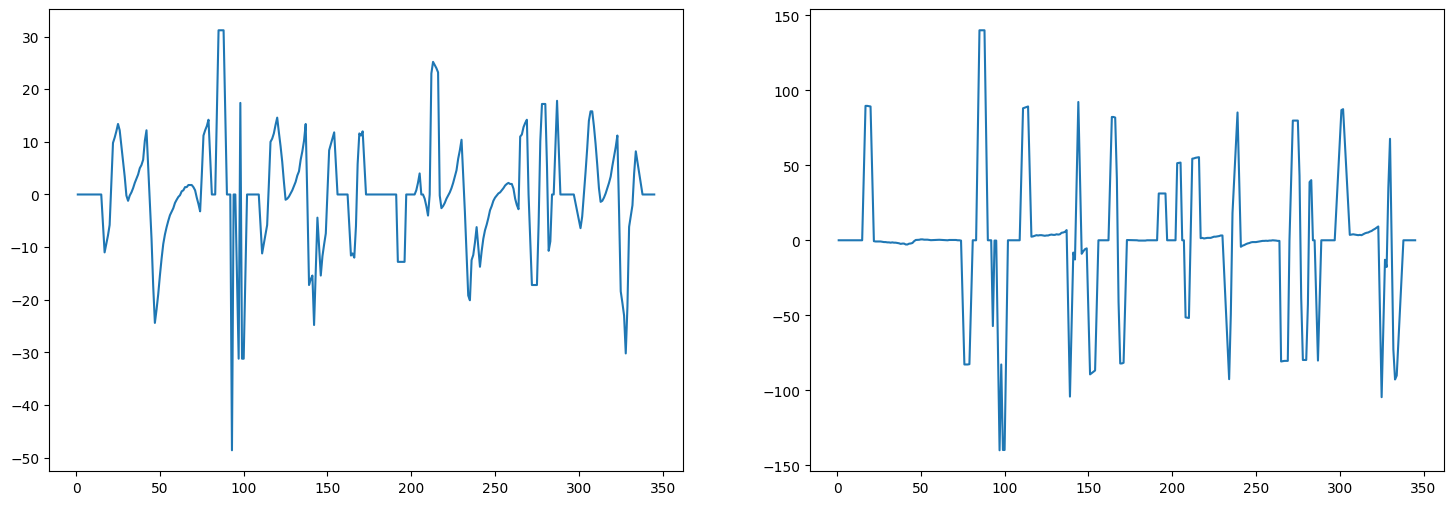

In [22]:
df_ball_positions['delta_y'] = df_ball_positions['y_ma'].diff()
df_ball_positions['delta_x'] = df_ball_positions['x_ma'].diff()


plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(df_ball_positions['delta_y'])
plt.subplot(1, 2, 2)
plt.plot(df_ball_positions['delta_x'])

In [23]:
df_ball_positions['ball_hit'] = 0


minimum_change_frames_for_hit = 25

for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit*1.2) ):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame] < 0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[change_frame] > 0

            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count > minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1


frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit'] == 1].index.tolist()
df_ball_positions[df_ball_positions['ball_hit'] == 1]

,x,y,y_ma,x_ma,delta_y,delta_x,ball_hit,y_ma_shifted,x_ma_shifted,x_norm,y_norm,y_shifted,x_shifted,distance


array([  6., 177.])

In [44]:
# distance = df_ball_positions['distance']
# threshold = df_ball_positions['distance'][1:].quantile(0.90)
new_ball_positions = []

last_good_coordinates = df_ball_positions[['x', 'y']].values[0]

for i in range(len(df_ball_positions)):
    current_coords = df_ball_positions[['x', 'y']].values[i]
    distance = measure_distance(current_coords, last_good_coordinates)
    # distance = df_ball_positions['distance'][i]
    if distance > 100:
        new_ball_positions.append([np.nan, np.nan])
    else:
        last_good_coordinates = current_coords
        new_ball_positions.append(current_coords)
        
    

new_ball_positions

[array([  6., 177.]),
 array([  6., 177.]),
 array([  6., 177.]),
 array([  6., 177.]),
 array([  6., 177.]),
 array([  6., 177.]),
 array([  6., 177.]),
 array([  6., 177.]),
 array([  6., 177.]),
 array([  6., 177.]),
 array([  6., 177.]),
 array([  6., 177.]),
 array([  6., 177.]),
 array([  6., 177.]),
 array([  6., 177.]),
 array([  6., 177.]),
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan]

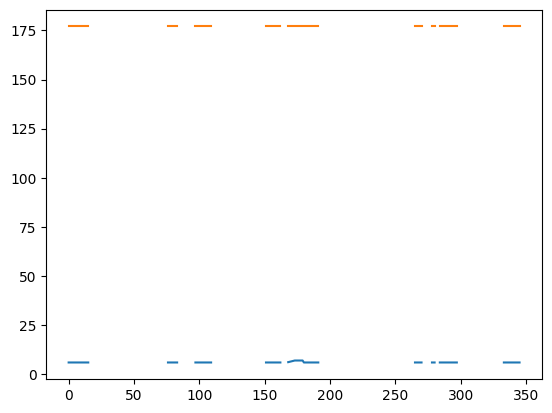

In [45]:
plt.plot(new_ball_positions)

In [24]:
np.clip()

TypeError: clip() missing 3 required positional arguments: 'a', 'a_min', and 'a_max'

## Second type of ball bounce prediction

In [ ]:
from src.scripts import BounceDetector

/home/suetin/Projects/VSCode/TennisApp/MainApp/TennisApp


In [ ]:
bounce_detector = BounceDetector('./models/ctb_regr_bounce.cbm')  # 
bounce_detector.model

In [ ]:
type(ball_positions)

list

In [ ]:
ball_positions = np.array(ball_positions)
ball_positions.shape

(346, 2)

In [ ]:
x, y = bounce_detector.smooth_predictions(ball_positions[:, 0], ball_positions[:, 1])
x, y

(array([None, 6, None, None, None, None, None, None, None, None, 6, 6, None, None, None, 6, 456, 454, 454, 453, 452, 451, 451, 450, 449, 448, 447, 446, 444, 443, 441, 440, 438, 437, 435, 433, 431, 428, 425, 424, 422, 417, 414, 6, 414, 413, 414, 415, 415, 415, 416, 417, 7, 417, 417, 417, 7, 418, 418, 418, 419, 419, 419,
        419, 419, 419, 419, 420, 420, 420, 420, 420, 420, 420, 419, 6, 6, 6, 6, 6, 6, 6, 6, 6, 706, 706, 706, 706, 706, 706, 706, 706, 706, 420, 705, 705, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 442, 446, 6, 449, 452, 456, 458, 461, 465, 469, 472, 475, 478, 481, 484, 488, 491, 496, 500, 502, 506, 511, 515, 520, 527,
        532, 539, 549, 6, 6, 514, 498, 485, 474, 467, 459, 453, 6, 443, 440, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 417, 417, 417, 415, 6, -403.0, -811.9999999999998, -1220.9999999999993, None, None, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 419,
        420, 421, 162, 162, 162, 162, 162,

In [ ]:
df, feats = bounce_detector.prepare_features(x, y)
df

,x_diff_1,x_diff_2,x_diff_inv_1,x_diff_inv_2,x_div_1,x_div_2,y_diff_1,y_diff_2,y_diff_inv_1,y_diff_inv_2,y_div_1,y_div_2
17,2,448,0,1,1999999999999999.75,448.0,-6,55,8,16,-0.75,3.4375
18,0,2,1,2,0.0,1.0,-8,-14,8,18,-1.0,-0.777778
19,1,1,1,2,1.0,0.5,-8,-16,10,21,-0.8,-0.761905
20,1,2,1,1,1.0,2.0,-10,-18,11,23,-0.909091,-0.782609
21,1,2,0,1,999999999999999.875,2.0,-11,-21,12,25,-0.916667,-0.84
...,...,...,...,...,...,...,...,...,...,...,...,...
332,436,0,0,0,435999999999999936.0,0.0,-59,0,0,0,-58999999999999992.0,0.0
333,0,436,0,0,0.0,435999999999999936.0,0,-59,0,0,0.0,-58999999999999992.0
334,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
335,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0


In [ ]:
bounce_detector.model.predict(df)

array([   -0.09215,   0.0025262,    0.012674,  -0.0039153,  0.00028111,   0.0031282,   0.0091036,    0.049764,     0.42476,     0.45634,     0.12285,   0.0060857,    0.010045,  -0.0030751,   0.0010693,   -0.000746,   0.0026991,   0.0046758,   0.0078312,   0.0072292,  3.3588e-05,   0.0032562,   0.0051028,  -0.0056025,
         -0.096734,     0.18013,   0.0060526,  -0.0084432,     0.16381,  -0.0074187,  -0.0048191,   0.0088348,   0.0040801,   -0.036518,  -0.0084199,    0.052823,     0.19848,   0.0027789,    0.069996,     0.12515,     0.21906,     0.08137,   0.0095721,  0.00079634,  -0.0026033,  0.00083689,    0.010152,    0.007792,
         -0.010785,   0.0051934,  -0.0086603,    0.016007,     0.13965,     0.11863,     0.17039,    0.053038,   -0.043614,   -0.033824,      0.3992,     0.70743,   0.0034475,   0.0034475,   0.0034475,   0.0034475,   0.0034475,   -0.025258,   -0.032622,     0.36182,     0.71209,   0.0034475,   0.0034475,   0.0034475,
         0.0034475,   0.0034475,   -0.03010

In [ ]:
ball_bounced = bounce_detector.predict(ball_positions[:, 0], ball_positions[:, 1], smooth=False)
ball_bounced

[26, 76, 85, 112, 120, 151, 213, 261, 266, 284, 308, 333]